In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\cirrhosis.csv")
df

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  21464   F       Y            Y   
1      2    4500      C  D-penicillamine  20617   F       N            Y   
2      3    1012      D  D-penicillamine  25594   M       N            N   
3      4    1925      D  D-penicillamine  19994   F       N            Y   
4      5    1504     CL          Placebo  13918   F       N            Y   
..   ...     ...    ...              ...    ...  ..     ...          ...   
413  414     681      D              NaN  24472   F     NaN          NaN   
414  415    1103      C              NaN  14245   F     NaN          NaN   
415  416    1055      C              NaN  20819   F     NaN          NaN   
416  417     691      C              NaN  21185   F     NaN          NaN   
417  418     976      C              NaN  19358   F     NaN          NaN   

    Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0         Y     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1         Y     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2         N     S        1.4        176.0     3.48   210.0     516.0   96.10   
3         Y     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4         Y     N        3.4        279.0     3.53   143.0     671.0  113.15   
..      ...   ...        ...          ...      ...     ...       ...     ...   
413     NaN     N        1.2          NaN     2.96     NaN       NaN     NaN   
414     NaN     N        0.9          NaN     3.83     NaN       NaN     NaN   
415     NaN     N        1.6          NaN     3.42     NaN       NaN     NaN   
416     NaN     N        0.8          NaN     3.75     NaN       NaN     NaN   
417     NaN     N        0.7          NaN     3.29     NaN       NaN     NaN   

     Tryglicerides  Platelets  Prothrombin  Stage  
0            172.0      190.0         12.2    4.0  
1             88.0      221.0         10.6    3.0  
2             55.0      151.0         12.0    4.0  
3             92.0      183.0         10.3    4.0  
4             72.0      136.0         10.9    3.0  
..             ...        ...          ...    ...  
413            NaN      174.0         10.9    3.0  
414            NaN      180.0         11.2    4.0  
415            NaN      143.0          9.9    3.0  
416            NaN      269.0         10.4    3.0  
417            NaN      350.0         10.6    4.0  

[418 rows x 20 columns]

# DATA CLEANİNG

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [4]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [5]:
df.sample()

ID  N_Days Status Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
370  371     489      D  NaN  18628   F     NaN          NaN     NaN     S   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT  Tryglicerides  \
370        7.3          NaN     3.52     NaN       NaN   NaN            NaN   

     Platelets  Prothrombin  Stage  
370      265.0         11.1    1.0

In [6]:
df.head(5)

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [7]:
df.tail()

ID  N_Days Status Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
413  414     681      D  NaN  24472   F     NaN          NaN     NaN     N   
414  415    1103      C  NaN  14245   F     NaN          NaN     NaN     N   
415  416    1055      C  NaN  20819   F     NaN          NaN     NaN     N   
416  417     691      C  NaN  21185   F     NaN          NaN     NaN     N   
417  418     976      C  NaN  19358   F     NaN          NaN     NaN     N   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT  Tryglicerides  \
413        1.2          NaN     2.96     NaN       NaN   NaN            NaN   
414        0.9          NaN     3.83     NaN       NaN   NaN            NaN   
415        1.6          NaN     3.42     NaN       NaN   NaN            NaN   
416        0.8          NaN     3.75     NaN       NaN   NaN            NaN   
417        0.7          NaN     3.29     NaN       NaN   NaN            NaN   

     Platelets  Prothrombin  Stage  
413      174.0         10.9    3.0  
414      180.0         11.2    4.0  
415      143.0          9.9    3.0  
416      269.0         10.4    3.0  
417      350.0         10.6    4.0

In [8]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [9]:
df.fillna(method="ffill", inplace=True)

In [10]:
df.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [11]:
df.shape

(418, 20)

In [12]:
df.duplicated().any()

False

In [13]:
df.describe().T

count          mean          std      min         25%  \
ID             418.0    209.500000   120.810458     1.00    105.2500   
N_Days         418.0   1917.782297  1104.672992    41.00   1092.7500   
Age            418.0  18533.351675  3815.845055  9598.00  15644.5000   
Bilirubin      418.0      3.220813     4.407506     0.30      0.8000   
Cholesterol    418.0    421.212919   218.398169   120.00    263.0000   
Albumin        418.0      3.497440     0.424972     1.96      3.2425   
Copper         418.0    120.016746    83.159303     4.00     51.2500   
Alk_Phos       418.0   2016.216746  1849.336509   289.00   1016.2500   
SGOT           418.0    125.965502    49.314570    26.35     91.0000   
Tryglicerides  418.0    129.897129    55.798124    33.00     91.0000   
Platelets      418.0    255.483254    97.825425    62.00    185.7500   
Prothrombin    418.0     10.728469     1.020781     9.00     10.0000   
Stage          418.0      3.028708     0.883713     1.00      2.0000   

                    50%       75%       max  
ID               209.50    313.75    418.00  
N_Days          1730.00   2613.50   4795.00  
Age            18628.00  21272.50  28650.00  
Bilirubin          1.40      3.40     28.00  
Cholesterol      360.50    576.00   1775.00  
Albumin            3.53      3.77      4.64  
Copper           102.00    186.00    588.00  
Alk_Phos        1717.00   2115.00  13862.40  
SGOT             136.00    136.00    457.25  
Tryglicerides    133.00    149.00    598.00  
Platelets        248.00    315.50    721.00  
Prothrombin       10.60     11.10     18.00  
Stage              3.00      4.00      4.00

In [14]:
df.nunique()

ID               418
N_Days           399
Status             3
Drug               2
Age              344
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin         98
Cholesterol      201
Albumin          154
Copper           158
Alk_Phos         295
SGOT             179
Tryglicerides    146
Platelets        243
Prothrombin       48
Stage              4
dtype: int64

In [15]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unikal dəyərlər {column} sütununda:")
    print(unique_values)
    print("\n")

Unikal dəyərlər ID sütununda:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 

In [16]:
for i in df.select_dtypes(exclude="object"):
    fig=px.box(df, y=i)
    fig.show()

In [17]:
def outliers(melumat):    
    for col in melumat.columns:
        if melumat[col].dtype=="int64" or df[col].dtype=="float64":         
            q1=melumat[col].quantile(0.25)
            q3=melumat[col].quantile(0.75)            
            IQR=q3-q1
            lower_limit=q1-IQR*1.5
            upper_limit=q3+IQR*1.5            
            melumat[col]=np.where(melumat[col]>=upper_limit,upper_limit,np.where(melumat[col]<=lower_limit,lower_limit,melumat[col]))

In [18]:
outliers(df)

In [19]:
for i in df.select_dtypes(exclude="object"):
    fig=px.box(df, y=i)
    fig.show()

# DATA VİSUALİZATİON

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'N_Days'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Bilirubin'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'Copper'}>,
        <Axes: title={'center': 'Alk_Phos'}>],
       [<Axes: title={'center': 'SGOT'}>,
        <Axes: title={'center': 'Tryglicerides'}>,
        <Axes: title={'center': 'Platelets'}>,
        <Axes: title={'center': 'Prothrombin'}>],
       [<Axes: title={'center': 'Stage'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

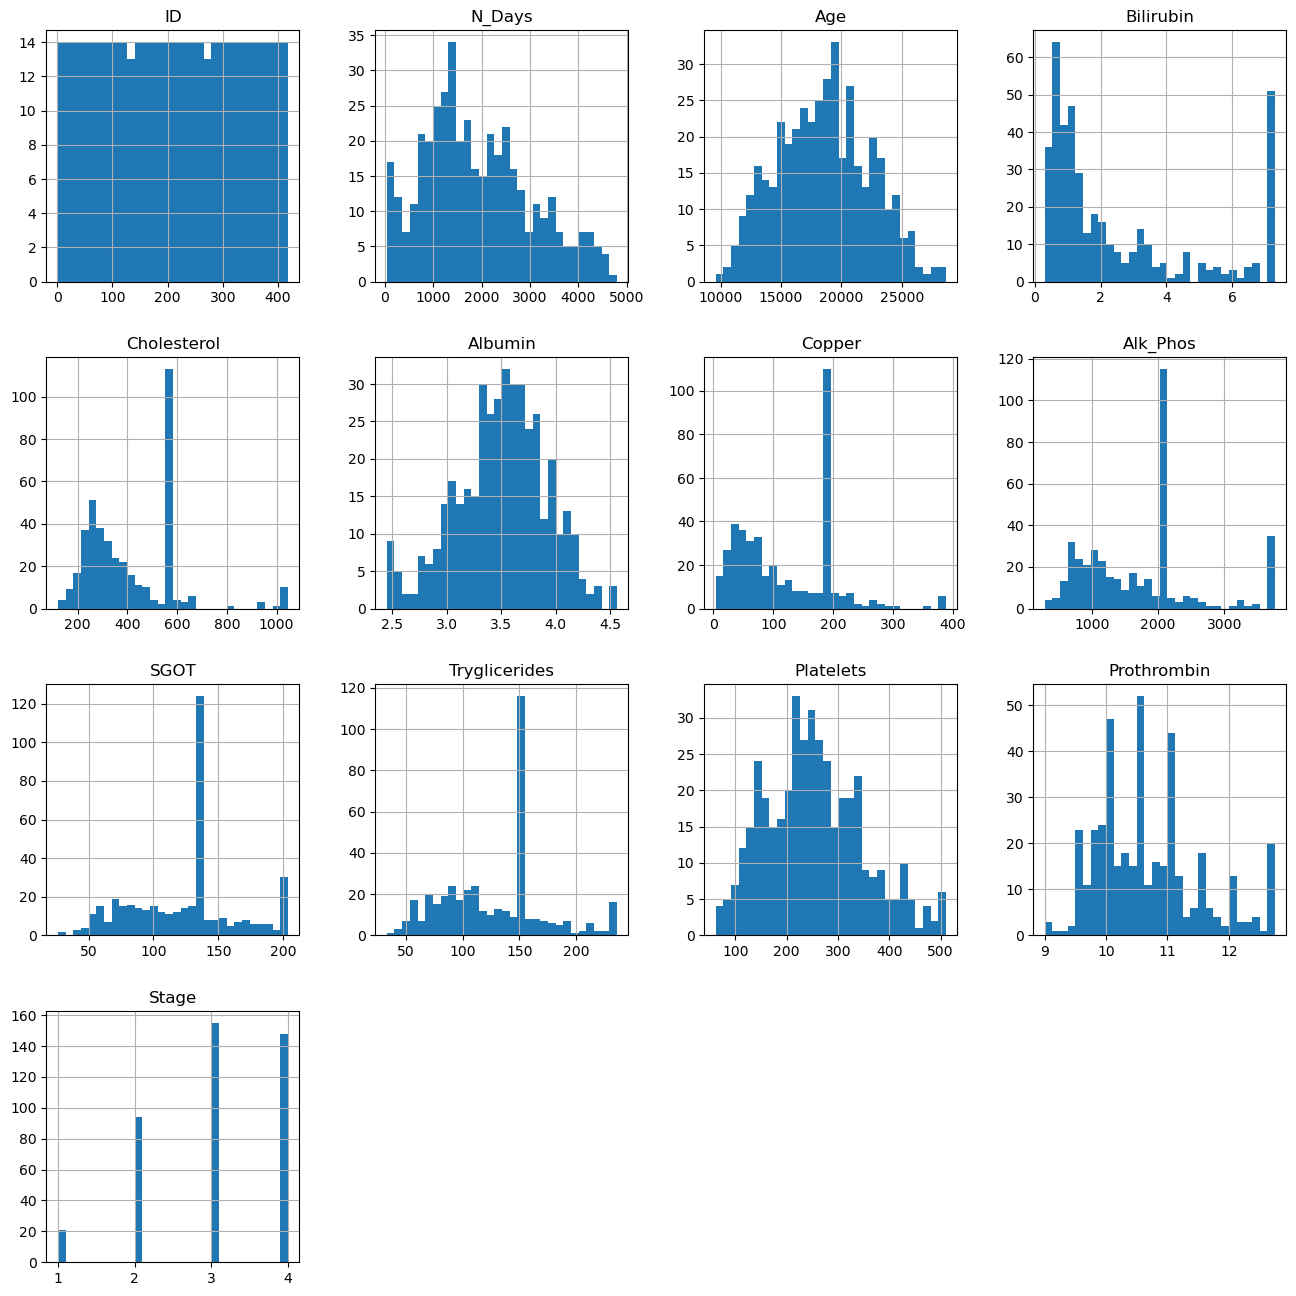

In [20]:
df.hist(bins=30, figsize=(16,16))

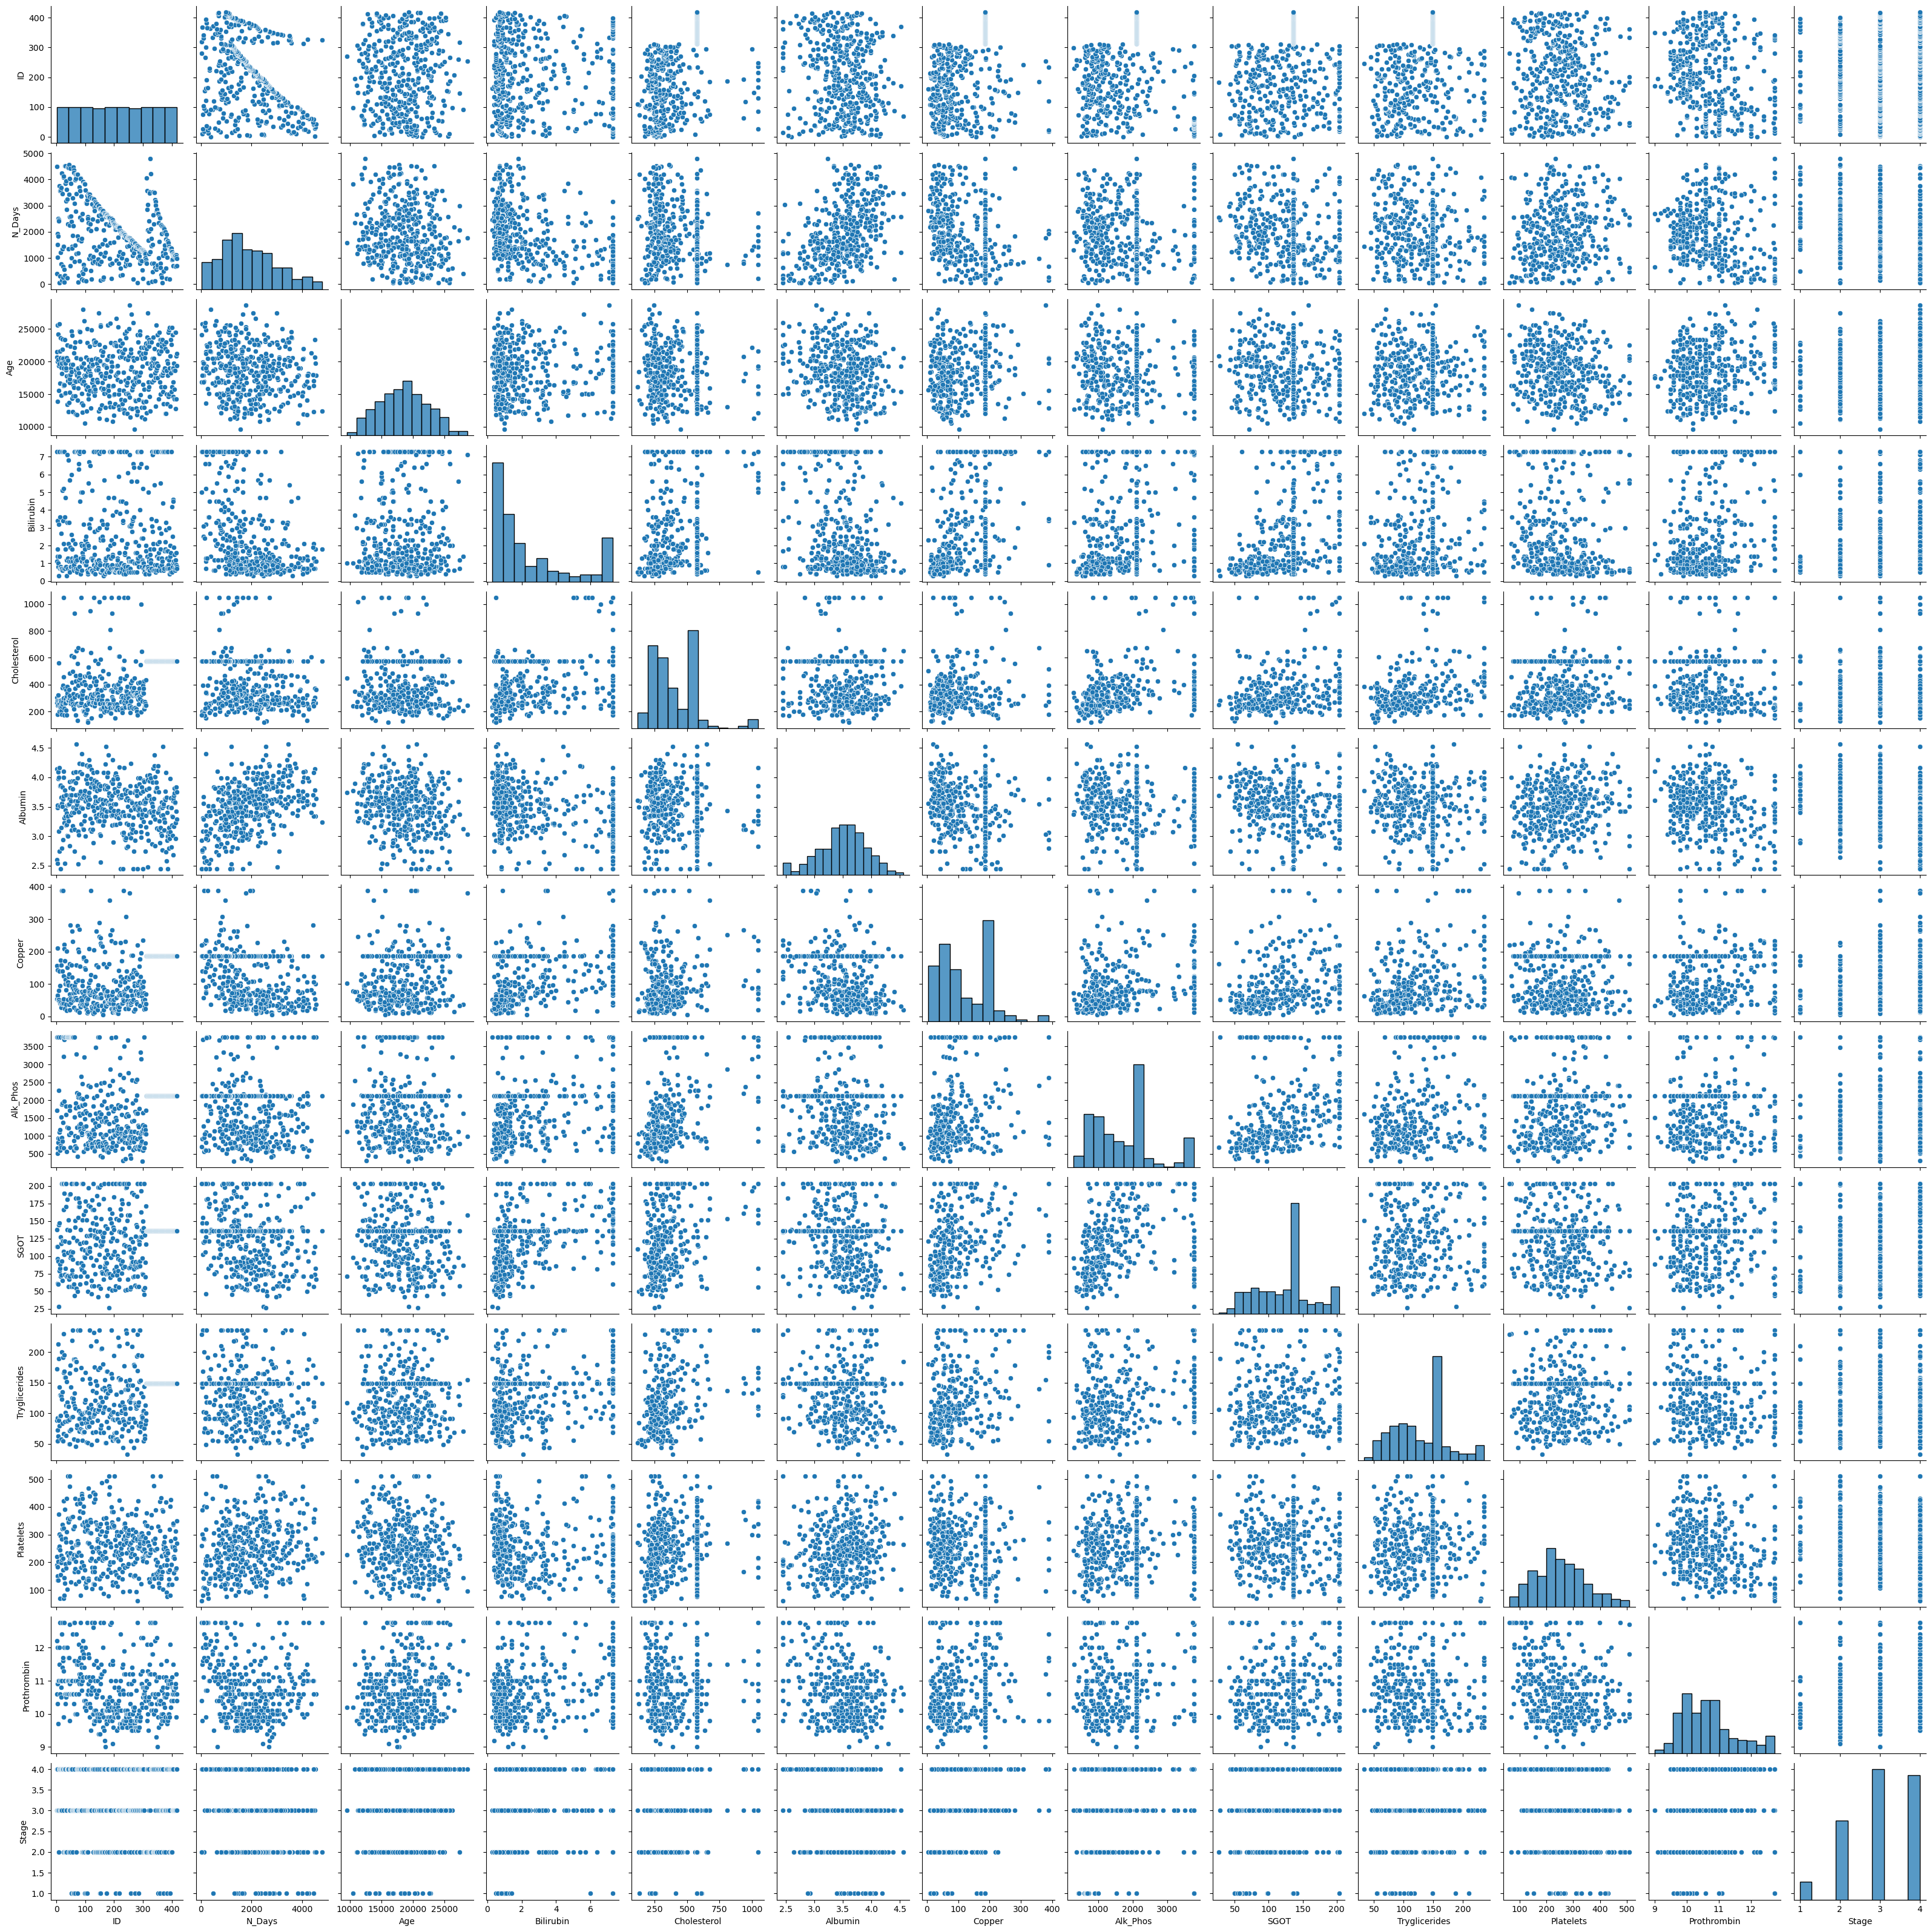

In [21]:
sns.pairplot(df)
plt.show()

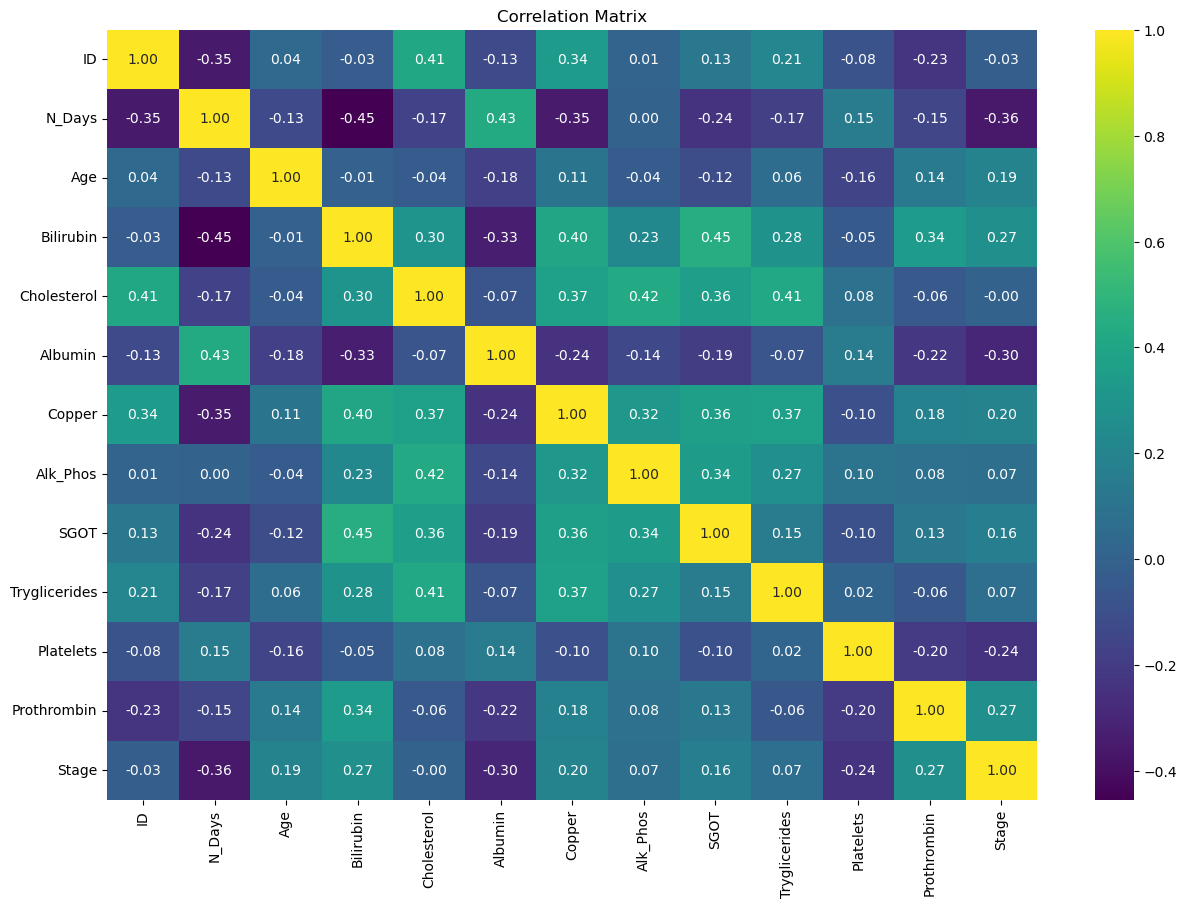

In [22]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cbar=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

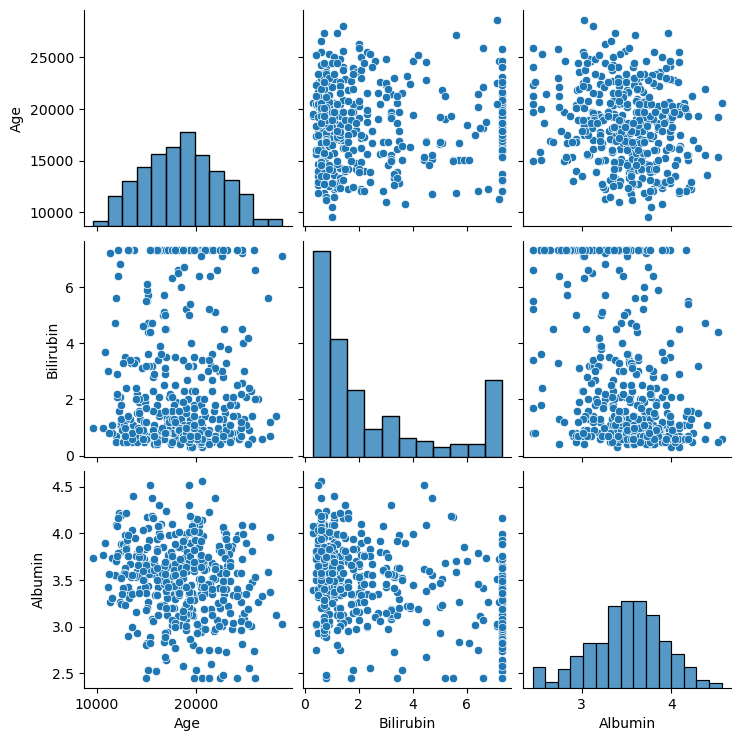

In [23]:
sns.pairplot(df, vars=["Age", "Bilirubin", "Albumin"])
plt.show()

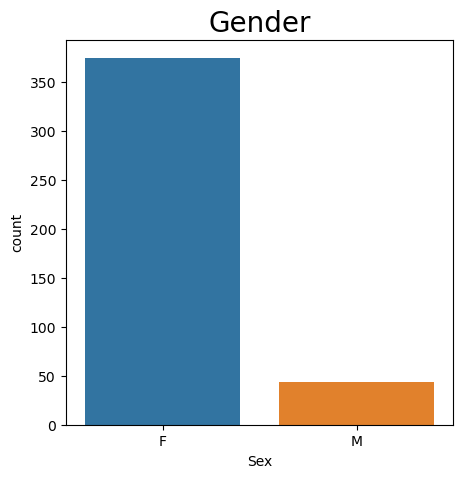

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x="Sex", data=df)
plt.title("Gender", fontsize=20)
plt.show()

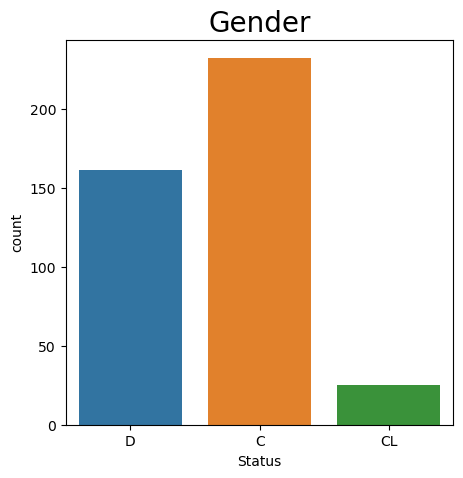

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(x="Status", data=df)
plt.title("Gender", fontsize=20)
plt.show()

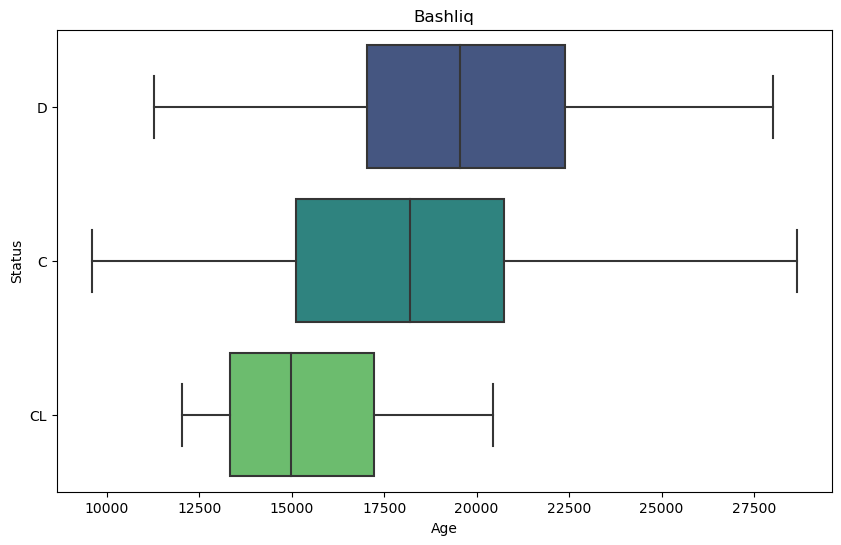

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Age", y="Status", data=df, palette="viridis")
plt.xlabel("Age")
plt.ylabel("Status")
plt.title("Bashliq")
plt.show()

In [27]:
df.drop(["N_Days"], axis=1, inplace= True)

In [28]:
df

ID Status             Drug      Age Sex Ascites Hepatomegaly Spiders  \
0      1.0      D  D-penicillamine  21464.0   F       Y            Y       Y   
1      2.0      C  D-penicillamine  20617.0   F       N            Y       Y   
2      3.0      D  D-penicillamine  25594.0   M       N            N       N   
3      4.0      D  D-penicillamine  19994.0   F       N            Y       Y   
4      5.0     CL          Placebo  13918.0   F       N            Y       Y   
..     ...    ...              ...      ...  ..     ...          ...     ...   
413  414.0      D          Placebo  24472.0   F       N            N       Y   
414  415.0      C          Placebo  14245.0   F       N            N       Y   
415  416.0      C          Placebo  20819.0   F       N            N       Y   
416  417.0      C          Placebo  21185.0   F       N            N       Y   
417  418.0      C          Placebo  19358.0   F       N            N       Y   

    Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0       Y        7.3        261.0     2.60   156.0  1718.000  137.95   
1       N        1.1        302.0     4.14    54.0  3763.125  113.52   
2       S        1.4        176.0     3.48   210.0   516.000   96.10   
3       S        1.8        244.0     2.54    64.0  3763.125   60.63   
4       N        3.4        279.0     3.53   143.0   671.000  113.15   
..    ...        ...          ...      ...     ...       ...     ...   
413     N        1.2        576.0     2.96   186.0  2115.000  136.00   
414     N        0.9        576.0     3.83   186.0  2115.000  136.00   
415     N        1.6        576.0     3.42   186.0  2115.000  136.00   
416     N        0.8        576.0     3.75   186.0  2115.000  136.00   
417     N        0.7        576.0     3.29   186.0  2115.000  136.00   

     Tryglicerides  Platelets  Prothrombin  Stage  
0            172.0      190.0         12.2    4.0  
1             88.0      221.0         10.6    3.0  
2             55.0      151.0         12.0    4.0  
3             92.0      183.0         10.3    4.0  
4             72.0      136.0         10.9    3.0  
..             ...        ...          ...    ...  
413          149.0      174.0         10.9    3.0  
414          149.0      180.0         11.2    4.0  
415          149.0      143.0          9.9    3.0  
416          149.0      269.0         10.4    3.0  
417          149.0      350.0         10.6    4.0  

[418 rows x 19 columns]

# ENCODİNG

In [29]:
le = LabelEncoder()
df["Status"] = le.fit_transform(df["Status"])
for column in df:
    df[column] = le.fit_transform(df[column])

In [30]:
df

ID  Status  Drug  Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0      0       2     0  267    0        1             1        1      2   
1      1       0     0  249    0        0             1        1      0   
2      2       2     0  333    1        0             0        0      1   
3      3       2     0  223    0        0             1        1      1   
4      4       1     1   52    0        0             1        1      0   
..   ...     ...   ...  ...  ...      ...           ...      ...    ...   
413  413       2     1  317    0        0             0        1      0   
414  414       0     1   61    0        0             0        1      0   
415  415       0     1  256    0        0             0        1      0   
416  416       0     1  260    0        0             0        1      0   
417  417       0     1  207    0        0             0        1      0   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT  Tryglicerides  \
0           61           58        6     112       196   111            105   
1            8           86      132      45       264    82             37   
2           11            9       72     131         8    60              7   
3           15           44        3      52       264    20             41   
4           31           71       77     105        32    81             21   
..         ...          ...      ...     ...       ...   ...            ...   
413          9          177       24     121       226   107             90   
414          6          177      106     121       226   107             90   
415         13          177       66     121       226   107             90   
416          5          177       98     121       226   107             90   
417          4          177       53     121       226   107             90   

     Platelets  Prothrombin  Stage  
0           66           32      3  
1           91           16      2  
2           42           30      3  
3           62           13      3  
4           30           19      2  
..         ...          ...    ...  
413         55           19      2  
414         59           22      3  
415         36            9      2  
416        126           14      2  
417        189           16      3  

[418 rows x 19 columns]

# SPLİTİNG

In [31]:
X = df.drop(columns=["Status"])
y = df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train

ID  Drug  Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  Bilirubin  \
336  336     1  239    0        0             0        1      0         15   
31    31     1  217    0        0             1        0      0         15   
84    84     1  141    0        0             1        0      0         18   
287  287     1  158    0        0             1        0      1         61   
317  317     1   96    0        0             0        1      0          4   
..   ...   ...  ...  ...      ...           ...      ...    ...        ...   
71    71     1    9    0        0             0        0      0          2   
106  106     1  295    0        0             0        0      0          3   
270  270     1  176    0        0             1        0      0          7   
348  348     1  218    0        0             0        1      0         11   
102  102     1  159    0        1             1        1      2         22   

     Cholesterol  Albumin  Copper  Alk_Phos  SGOT  Tryglicerides  Platelets  \
336          177       88     121       226   107             90         34   
31            59       58      81       264    42             98        140   
84            59       72      47       222    53             33         94   
287           91      111      85        20    85            134        149   
317          177       92     121       226   107             90        156   
..           ...      ...     ...       ...   ...            ...        ...   
71            97       78      42       144    92             29         94   
106           24      124       2        25    28             26        163   
270           98       74      76        83    79            108        142   
348          177      105     121       226   107             90        110   
102           12       91      46       149    87             51         15   

     Prothrombin  Stage  
336           10      3  
31            16      3  
84            25      3  
287            6      1  
317            5      1  
..           ...    ...  
71            10      2  
106           37      0  
270            7      2  
348           13      1  
102           21      3  

[334 rows x 18 columns]

In [33]:
X_test

ID  Drug  Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  Bilirubin  \
321  321     1  306    0        0             0        1      0          8   
324  324     1   22    0        0             0        1      0         15   
388  388     1  317    0        0             0        1      0          4   
56    56     0  212    0        0             1        0      1         20   
153  153     0  329    1        0             0        1      2         21   
..   ...   ...  ...  ...      ...           ...      ...    ...        ...   
57    57     0  111    1        0             0        0      0          4   
126  126     1  106    0        0             0        0      0          2   
24    24     1  116    0        0             0        0      0          4   
17    17     0  216    0        0             1        1      2         61   
66    66     1  184    0        0             0        0      0          8   

     Cholesterol  Albumin  Copper  Alk_Phos  SGOT  Tryglicerides  Platelets  \
321          177       93     121       226   107             90         32   
324          177       50     121       226   107             90        100   
388          177       33     121       226   107             90         49   
56            57       44     138       264    73             43         87   
153            5        4     136       106    89             24         13   
..           ...      ...     ...       ...   ...            ...        ...   
57            42      128      60       264    15             66         87   
126           63      128       1       133    49             44        230   
24            83      130      31        28    75             15        169   
17            10       13     153        85   157            120        138   
66           161      113      70       199   157            113        120   

     Prothrombin  Stage  
321           15      3  
324           37      1  
388           10      3  
56            34      2  
153           37      2  
..           ...    ...  
57            16      0  
126           10      1  
24            23      1  
17            34      3  
66            10      2  

[84 rows x 18 columns]

In [34]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (334, 18)
X_test shape: (84, 18)
y_train shape: (334,)
y_test shape: (84,)


# SCAİLİNG

In [35]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
X_train

array([[ 1.10264521,  0.80331824,  0.6322259 , ..., -1.30461962,
        -0.79626636,  1.11931034],
       [-1.53115867,  0.80331824,  0.40823381, ...,  0.39243564,
        -0.07159888,  1.11931034],
       [-1.07348127,  0.80331824, -0.36555704, ..., -0.3440223 ,
         1.01540233,  1.11931034],
       ...,
       [ 0.53270732,  0.80331824, -0.00920599, ...,  0.42445555,
        -1.15860009, -0.00336129],
       [ 1.20627028,  0.80331824,  0.41841527, ..., -0.08786302,
        -0.43393262, -1.12603293],
       [-0.91804366,  0.80331824, -0.18229079, ..., -1.60880877,
         0.53229068,  1.11931034]])

In [37]:
X_test

array([[ 0.97311387,  0.80331824,  1.31438362, ..., -1.33663953,
        -0.19237679,  1.11931034],
       [ 0.99902014,  0.80331824, -1.57715061, ..., -0.24796257,
         2.46473728, -1.12603293],
       [ 1.55168719,  0.80331824,  1.42637967, ..., -1.06447029,
        -0.79626636,  1.11931034],
       ...,
       [-1.59160662,  0.80331824, -0.6200935 , ...,  0.85672434,
         0.77384651, -1.12603293],
       [-1.65205458, -1.24483666,  0.39805235, ...,  0.36041573,
         2.10240354,  1.11931034],
       [-1.22891888,  0.80331824,  0.07224568, ...,  0.07223653,
        -0.79626636, -0.00336129]])

In [38]:
X_train = pd.DataFrame(X_train)
X_train.columns = df.drop("Status", axis=1).columns

In [39]:
X_train

ID      Drug       Age       Sex   Ascites  Hepatomegaly   Spiders  \
0    1.102645  0.803318  0.632226 -0.352958 -0.245596     -0.788263  1.100873   
1   -1.531159  0.803318  0.408234 -0.352958 -0.245596      1.268611 -0.908370   
2   -1.073481  0.803318 -0.365557 -0.352958 -0.245596      1.268611 -0.908370   
3    0.679510  0.803318 -0.192472 -0.352958 -0.245596      1.268611 -0.908370   
4    0.938572  0.803318 -0.823723 -0.352958 -0.245596     -0.788263  1.100873   
..        ...       ...       ...       ...       ...           ...       ...   
329 -1.185742  0.803318 -1.709510 -0.352958 -0.245596     -0.788263 -0.908370   
330 -0.883502  0.803318  1.202388 -0.352958 -0.245596     -0.788263 -0.908370   
331  0.532707  0.803318 -0.009206 -0.352958 -0.245596      1.268611 -0.908370   
332  1.206270  0.803318  0.418415 -0.352958 -0.245596     -0.788263  1.100873   
333 -0.918044  0.803318 -0.182291 -0.352958  4.071725      1.268611  1.100873   

        Edema  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
0   -0.387555  -0.233261     1.060039  0.364016  1.021400  0.823948  0.525256   
1   -0.387555  -0.233261    -0.925242 -0.485807  0.081988  1.290865 -1.008272   
2   -0.387555  -0.080797    -0.925242 -0.089223 -0.716513  0.774799 -0.748752   
3    1.667101   2.104519    -0.386861  1.015547  0.175929 -1.707235  0.006216   
4   -0.387555  -0.792295     1.060039  0.477326  1.021400  0.823948  0.525256   
..        ...        ...          ...       ...       ...       ...       ...   
329 -0.387555  -0.893937    -0.285914  0.080742 -0.833939 -0.183610  0.171365   
330 -0.387555  -0.843116    -1.514097  1.383804 -1.773352 -1.645799 -1.338570   
331 -0.387555  -0.639831    -0.269090 -0.032568 -0.035439 -0.933136 -0.135340   
332 -0.387555  -0.436546     1.060039  0.845583  1.021400  0.823948  0.525256   
333  3.721756   0.122488    -1.715990  0.448998 -0.739998 -0.122174  0.053402   

     Tryglicerides  Platelets  Prothrombin     Stage  
0         0.610024  -1.304620    -0.796266  1.119310  
1         0.844318   0.392436    -0.071599  1.119310  
2        -1.059321  -0.344022     1.015402  1.119310  
3         1.898641   0.536525    -1.279378 -1.126033  
4         0.610024   0.648595    -1.400156 -1.126033  
..             ...        ...          ...       ...  
329      -1.176468  -0.344022    -0.796266 -0.003361  
330      -1.264328   0.760665     2.464737 -2.248705  
331       1.137185   0.424456    -1.158600 -0.003361  
332       0.610024  -0.087863    -0.433933 -1.126033  
333      -0.532160  -1.608809     0.532291  1.119310  

[334 rows x 18 columns]

# MODELS

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

# XGBoost

In [41]:
!pip install xgboost
from xgboost import XGBClassifier
import xgboost as xgb

In [42]:
from sklearn.preprocessing import label_binarize

# XGB modelinin yaradılması
xgb_model = xgb.XGBClassifier(random_state=42)

# XGB modelinin təlim edilməsi
xgb_model.fit(X_train, y_train)

# Təlim dəstəsi üzərində proqnozlar
y_pred_train = xgb_model.predict(X_train)

# Test dəstəsi üzərində proqnozlar
y_pred_test = xgb_model.predict(X_test)

# Təlim performans metriklərinin hesablanması
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average="macro")

# Çox sinifli ROC-AUC üçün `y_train` binarlaşdırılır
y_train_binarized = label_binarize(y_train, classes=xgb_model.classes_)
roc_auc_train = roc_auc_score(y_train_binarized, xgb_model.predict_proba(X_train), average="macro", multi_class="ovr")

# Test performans metriklərinin hesablanması
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average="macro")

# Çox sinifli ROC-AUC üçün `y_test` binarlaşdırılır
y_test_binarized = label_binarize(y_test, classes=xgb_model.classes_)
roc_auc_test = roc_auc_score(y_test_binarized, xgb_model.predict_proba(X_test), average="macro", multi_class="ovr")

# Nəticələrin çap edilməsi
print("Train Metrics:")
print(f"XGBoost Train Accuracy: {accuracy_train:.2f}")
print(f"XGBoost Train F1 Score (macro): {f1_train:.2f}")
print(f"XGBoost Train ROC-AUC: {roc_auc_train:.2f}")

print("\nTest Metrics:")
print(f"XGBoost Test Accuracy: {accuracy_test:.2f}")
print(f"XGBoost Test F1 Score (macro): {f1_test:.2f}")
print(f"XGBoost Test ROC-AUC: {roc_auc_test:.2f}")

Train Metrics:
XGBoost Train Accuracy: 1.00
XGBoost Train F1 Score (macro): 1.00
XGBoost Train ROC-AUC: 1.00

Test Metrics:
XGBoost Test Accuracy: 0.74
XGBoost Test F1 Score (macro): 0.61
XGBoost Test ROC-AUC: 0.85


# Logistic Regression

In [43]:
# Logistic Regression modelinin yaradılması və təlim edilməsi
log_r = LogisticRegression(multi_class="ovr")
log_r.fit(X_train, y_train)

# Təlim dəstəsi üzərində proqnozlar
y_pred_log_r_train = log_r.predict(X_train)

# Test dəstəsi üzərində proqnozlar
y_pred_log_r_test = log_r.predict(X_test)

# Təlim dəstəsi üçün performans metriklərinin hesablanması
accuracy_log_r_train = accuracy_score(y_train, y_pred_log_r_train)
precision_log_r_train = precision_score(y_train, y_pred_log_r_train, average="macro")
recall_log_r_train = recall_score(y_train, y_pred_log_r_train, average="macro")
f1_log_r_train = f1_score(y_train, y_pred_log_r_train, average="macro")

# Çox sinifli ROC-AUC üçün `y_train` binarlaşdırılır
y_train_binarized = label_binarize(y_train, classes=log_r.classes_)
roc_auc_log_r_train = roc_auc_score(y_train_binarized, log_r.decision_function(X_train), average="macro", multi_class="ovr")

# Test dəstəsi üçün performans metriklərinin hesablanması
accuracy_log_r_test = accuracy_score(y_test, y_pred_log_r_test)
precision_log_r_test = precision_score(y_test, y_pred_log_r_test, average="macro")
recall_log_r_test = recall_score(y_test, y_pred_log_r_test, average="macro")
f1_log_r_test = f1_score(y_test, y_pred_log_r_test, average="macro")

# Çox sinifli ROC-AUC üçün `y_test` binarlaşdırılır
y_test_binarized = label_binarize(y_test, classes=log_r.classes_)
roc_auc_log_r_test = roc_auc_score(y_test_binarized, log_r.decision_function(X_test), average="macro", multi_class="ovr")

# Nəticələrin çap edilməsi
print("Train Metrics:")
print(f"Logistic Regression Train Accuracy: {accuracy_log_r_train:.2f}")
print(f"Logistic Regression Train Precision: {precision_log_r_train:.2f}")
print(f"Logistic Regression Train Recall: {recall_log_r_train:.2f}")
print(f"Logistic Regression Train F1 Score (macro): {f1_log_r_train:.2f}")
print(f"Logistic Regression Train ROC-AUC: {roc_auc_log_r_train:.2f}")

print("\nTest Metrics:")
print(f"Logistic Regression Test Accuracy: {accuracy_log_r_test:.2f}")
print(f"Logistic Regression Test Precision: {precision_log_r_test:.2f}")
print(f"Logistic Regression Test Recall: {recall_log_r_test:.2f}")
print(f"Logistic Regression Test F1 Score (macro): {f1_log_r_test:.2f}")
print(f"Logistic Regression Test ROC-AUC: {roc_auc_log_r_test:.2f}")

Train Metrics:
Logistic Regression Train Accuracy: 0.80
Logistic Regression Train Precision: 0.86
Logistic Regression Train Recall: 0.60
Logistic Regression Train F1 Score (macro): 0.62
Logistic Regression Train ROC-AUC: 0.89

Test Metrics:
Logistic Regression Test Accuracy: 0.75
Logistic Regression Test Precision: 0.50
Logistic Regression Test Recall: 0.52
Logistic Regression Test F1 Score (macro): 0.51
Logistic Regression Test ROC-AUC: 0.85


# Random Forest

In [44]:
# RF modelinin yaradılması
rf_model = RandomForestClassifier(random_state=42)

# RF modelinin təlim edilməsi
rf_model.fit(X_train, y_train)

# Təlim dəstəsi üzərində proqnozlar
y_pred_rf_train = rf_model.predict(X_train)

# Test dəstəsi üzərində proqnozlar
y_pred_rf_test = rf_model.predict(X_test)

# Təlim performans metriklərinin hesablanması
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
f1_rf_train = f1_score(y_train, y_pred_rf_train, average="macro")

# Çox sinifli ROC-AUC üçün `y_train` binarlaşdırılır
y_train_binarized = label_binarize(y_train, classes=rf_model.classes_)
roc_auc_rf_train = roc_auc_score(y_train_binarized, rf_model.predict_proba(X_train), average="macro", multi_class="ovr")

# Test performans metriklərinin hesablanması
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
f1_rf_test = f1_score(y_test, y_pred_rf_test, average="macro")

# Çox sinifli ROC-AUC üçün `y_test` binarlaşdırılır
y_test_binarized = label_binarize(y_test, classes=rf_model.classes_)
roc_auc_rf_test = roc_auc_score(y_test_binarized, rf_model.predict_proba(X_test), average="macro", multi_class="ovr")

# Nəticələrin çap edilməsi
print("Train Metrics:")
print(f"Random Forest Train Accuracy: {accuracy_rf_train:.2f}")
print(f"Random Forest Train F1 Score (macro): {f1_rf_train:.2f}")
print(f"Random Forest Train ROC-AUC: {roc_auc_rf_train:.2f}")

print("\nTest Metrics:")
print(f"Random Forest Test Accuracy: {accuracy_rf_test:.2f}")
print(f"Random Forest Test F1 Score (macro): {f1_rf_test:.2f}")
print(f"Random Forest Test ROC-AUC: {roc_auc_rf_test:.2f}")

Train Metrics:
Random Forest Train Accuracy: 1.00
Random Forest Train F1 Score (macro): 1.00
Random Forest Train ROC-AUC: 1.00

Test Metrics:
Random Forest Test Accuracy: 0.74
Random Forest Test F1 Score (macro): 0.51
Random Forest Test ROC-AUC: 0.83


# Support Machine Vector

In [45]:
from sklearn.svm import SVC

# SVM modelinin yaradılması
svm = SVC(probability=True)  # ROC-AUC üçün ehtimalları əldə etmək üçün 'probability=True' istifadə olunur

# SVM modelinin təlim edilməsi
svm.fit(X_train, y_train)

# Təlim dəstəsi üzərində proqnozlar
y_pred_svm_train = svm.predict(X_train)

# Test dəstəsi üzərində proqnozlar
y_pred_svm_test = svm.predict(X_test)

# Təlim performans metriklərinin hesablanması
accuracy_svm_train = accuracy_score(y_train, y_pred_svm_train)
f1_svm_train = f1_score(y_train, y_pred_svm_train, average="macro")

# Çox sinifli ROC-AUC üçün `y_train` binarlaşdırılır
y_train_binarized = label_binarize(y_train, classes=svm.classes_)
roc_auc_svm_train = roc_auc_score(y_train_binarized, svm.predict_proba(X_train), average="macro", multi_class="ovr")

# Test performans metriklərinin hesablanması
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)
f1_svm_test = f1_score(y_test, y_pred_svm_test, average="macro")

# Çox sinifli ROC-AUC üçün `y_test` binarlaşdırılır
y_test_binarized = label_binarize(y_test, classes=svm.classes_)
roc_auc_svm_test = roc_auc_score(y_test_binarized, svm.predict_proba(X_test), average="macro", multi_class="ovr")

# Nəticələrin çap edilməsi
print("Train Metrics:")
print(f"SVM Train Accuracy: {accuracy_svm_train:.2f}")
print(f"SVM Train F1 Score (macro): {f1_svm_train:.2f}")
print(f"SVM Train ROC-AUC: {roc_auc_svm_train:.2f}")

print("\nTest Metrics:")
print(f"SVM Test Accuracy: {accuracy_svm_test:.2f}")
print(f"SVM Test F1 Score (macro): {f1_svm_test:.2f}")
print(f"SVM Test ROC-AUC: {roc_auc_svm_test:.2f}")

Train Metrics:
SVM Train Accuracy: 0.85
SVM Train F1 Score (macro): 0.58
SVM Train ROC-AUC: 0.96

Test Metrics:
SVM Test Accuracy: 0.79
SVM Test F1 Score (macro): 0.53
SVM Test ROC-AUC: 0.85


# Permutation İmportance (SVC model)

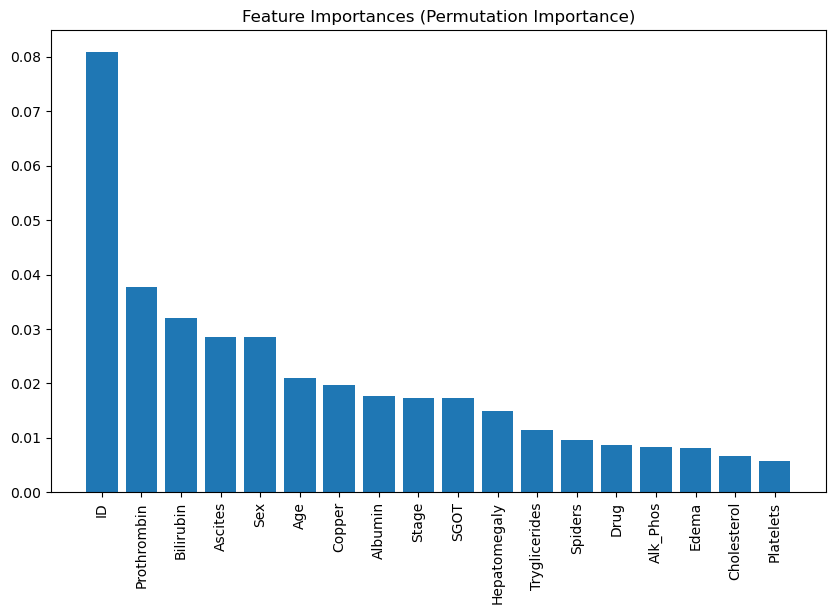

In [46]:
from sklearn.inspection import permutation_importance

# Permutasiyalı təsiri hesablamaq
result = permutation_importance(svm, X_train, y_train, n_repeats=10, random_state=42)

# Xüsusiyyətlərin təsirini vizuallaşdırmaq
importances = result.importances_mean
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Permutation Importance)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(X_train.columns)[indices], rotation=90)
plt.show()

# MODEL EVALUATİON

# Roc Auc

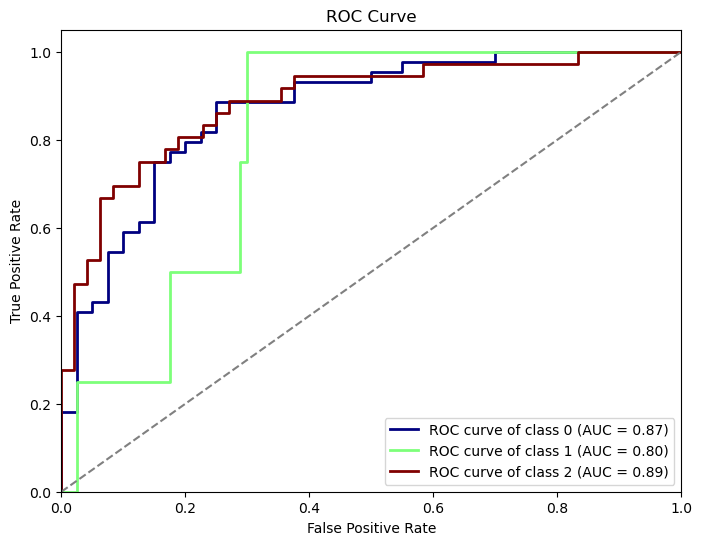

Average AUC Score: 0.85


In [47]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Test seti üzerinde tahminler yapma
y_pred_proba = svm.predict_proba(X_test)

# Test setindeki gerçek etiketleri binarize etme
y_test_binarized = label_binarize(y_test, classes=svm.classes_)

# ROC eğrisi ve AUC skoru hesaplama
fpr = {}
tpr = {}
roc_auc = {}
for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
colors = plt.cm.jet(np.linspace(0, 1, len(roc_auc)))
for i, color in zip(range(len(roc_auc)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f"ROC curve of class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Ortalama AUC skorunu hesaplama
average_roc_auc = np.mean(list(roc_auc.values()))
print(f"Average AUC Score: {average_roc_auc:.2f}")

# Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
cm = confusion_matrix(y_pred_svm_test, y_test)
cm

array([[39,  3,  9],
       [ 0,  0,  0],
       [ 5,  1, 27]], dtype=int64)

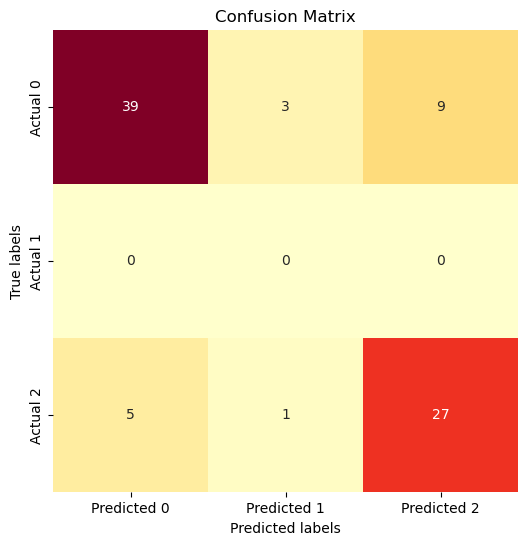

In [50]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap="YlOrRd", fmt="d", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1", "Predicted 2"],
            yticklabels=["Actual 0", "Actual 1", "Actual 2"])
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()